In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.metrics import mean_absolute_error
#from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
file = "my_laptop_prices.csv"
data = pd.read_csv(file)
#print(data.Memory.unique())
data.shape

(1303, 13)

In [2]:
data = data.fillna(0)

In [3]:
y = data.Price
X = data.drop(['Price'], axis=1)

# Divide data into training and validation subsets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.7, test_size=0.3,
                                                                random_state=0)

In [4]:
s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)
print(object_cols)

['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Memory', 'Gpu', 'OpSys']


In [5]:
print(data.isnull().sum())

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
SSD                 0
HDD                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64


In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Function for comparing different approaches
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=100, random_state = 0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

In [7]:
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[object_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid[object_cols]))

# One-hot encoding removed index; put it back
OH_cols_train.index = X_train.index
OH_cols_valid.index = X_valid.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(object_cols, axis=1)
num_X_valid = X_valid.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

print("MAE from Approach 3 (One-Hot Encoding):") 
print(score_dataset(OH_X_train, OH_X_valid, y_train, y_valid))

MAE from Approach 3 (One-Hot Encoding):
10969.039582525094


C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


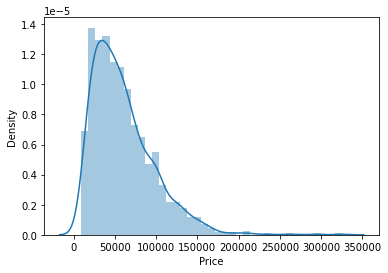

In [8]:
#Checking how the target column is distributed
sns.distplot(data['Price'])
plt.show()

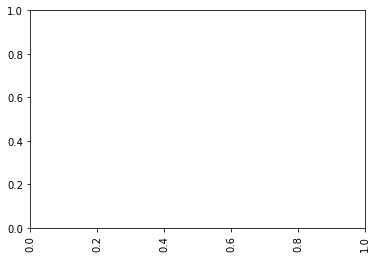

In [9]:
#CHECKING HOW THE TYPENAME IS RELATED TO THE PRICE OF THE LAPTOP
# sns.barplot(xa=data['TypeName'], y=data['Price'])
plt.xticks(rotation="vertical")
plt.show()

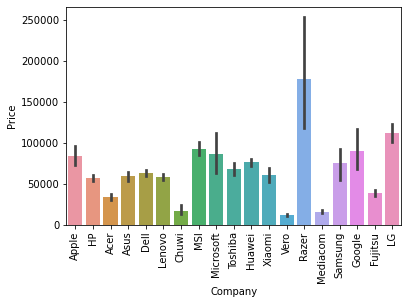

In [10]:
#Checking the relationship between the copany and the price of a laptop
sns.barplot(x=data['Company'], y=data['Price'])

plt.xticks(rotation="vertical")

plt.show()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Touchscreen', ylabel='Price'>

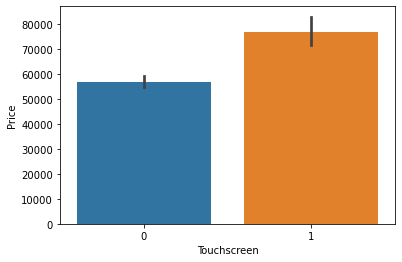

In [11]:
data['Touchscreen'] = data['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
#how many laptops in data are touchscreen
sns.countplot(data['Touchscreen'])
#Plot against price
sns.barplot(x=data['Touchscreen'],y=data['Price'])

<AxesSubplot:xlabel='Ips', ylabel='Price'>

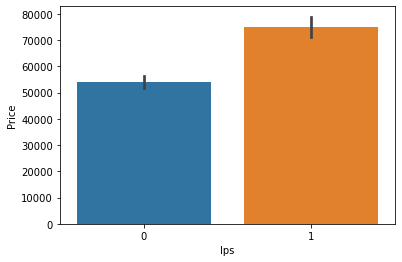

In [12]:
#extract IPS column
data['Ips'] = data['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
sns.barplot(x=data['Ips'],y=data['Price'])

In [13]:
# getting the last values of the rows of column ScreenResolution and spliting them into two rows and getting  X and Y values 
def findXresolution(s):
  return s.split()[-1].split("x")[0]
def findYresolution(s):
  return s.split()[-1].split("x")[1]
#finding the x_res and y_res from screen resolution
data['X_res'] = data['ScreenResolution'].apply(lambda x: findXresolution(x))
data['Y_res'] = data['ScreenResolution'].apply(lambda y: findYresolution(y))
#convert to numeric
data['X_res'] = data['X_res'].astype('int')
data['Y_res'] = data['Y_res'].astype('int')

In [14]:
# creating another (ppi) feature using the existing features
# using the ppi formula
# data: inches,X_res,Y_res
data['ppi'] = (((data['X_res']**2) + (data['Y_res']**2))**0.5/data['Inches']).astype('float')
data.corr()['Price'].sort_values(ascending=False)

Price          1.000000
Ram            0.743007
SSD            0.617447
X_res          0.556529
Y_res          0.552809
ppi            0.473487
Ips            0.252208
Weight         0.210370
Touchscreen    0.191226
Inches         0.068197
HDD           -0.085385
Name: Price, dtype: float64

In [15]:
#data.head(10)

In [16]:
#memory_category= data[["SSD","HDD"]]
#data["memory_category_count"] = data.gt(0).sum(axis=1) for data[["SSD","HDD"]]

In [17]:
# def mem_count():
#     for cols in data:
#         if cols==( data.loc[:,'HDD']> 0  & data.loc[ :,'SSD'] > 0):
#             data["cat"]=2
#         elif cols==data.loc[ : ,'HDD'] > 0 & data.loc[ : ,'SSD'] ==0:
#             data["cat"]=1
#         else:
#             data["cat"]= 0
#     return data + data["cat"]

# mem_count()
    

In [18]:
#data

In [19]:
#droping columns used to create feature (ppi)
data.drop(columns = ['ScreenResolution', 'Inches','X_res','Y_res'], inplace=True)

In [20]:
#evaluating the columns of data to see which their level of relation with the price
data.corr()['Price'].sort_values(ascending=False)

Price          1.000000
Ram            0.743007
SSD            0.617447
ppi            0.473487
Ips            0.252208
Weight         0.210370
Touchscreen    0.191226
HDD           -0.085385
Name: Price, dtype: float64

In [21]:
# extracting the Name of CPU which is first 3 words from Cpu column and then we will check which processor it is
def get_processor_name(x):
  processor_name = " ".join(x.split()[0:3])
  if processor_name == 'Intel Core i7' or processor_name== 'Intel Core i5' or processor_name == 'Intel Core i3':
    return processor_name
  elif processor_name.split()[0] == 'Intel':
    return 'Other Intel Processor'
  else:
    return 'AMD Processor'
data['Cpu_brand'] = data['Cpu'].apply(lambda x: get_processor_name(x))

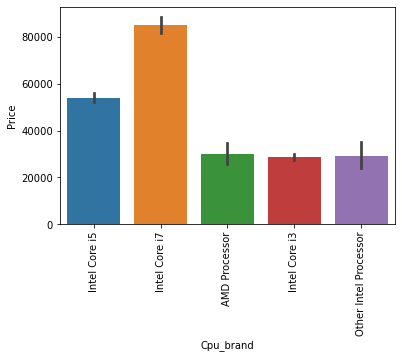

In [22]:
#visualization of how cpu_brand  is related to the prices of laptops
sns.barplot(x=data['Cpu_brand'],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


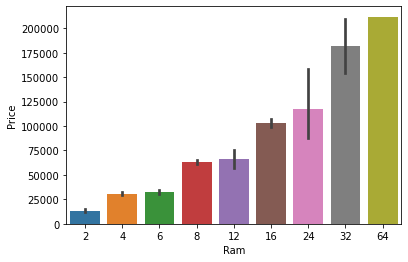

In [23]:
#visualization of how ram is related to the prices of laptops
sns.barplot(data['Ram'], data['Price'])
plt.show()

In [24]:
#data.head(30)

In [25]:
data.drop(columns=['Memory','Cpu'],inplace=True)

In [26]:
#data.head(30)

In [27]:
#differenciating laptops with different GPU
data['Gpu_brand'] = data['Gpu'].apply(lambda x:x.split()[0])
#remove the arm gpu because its contained only on one row
data = data[data['Gpu_brand'] != 'ARM']
data.drop(columns=['Gpu'],inplace=True)

In [28]:
#data.head(10)

In [29]:
#creating column os to specify os of the laptop from OpsSys column
def lap_os(x):
    if x == 'Windows 10' or x == 'Windows 7' or x == 'Windows 10 S':
        return 'Windows'
    elif x == 'macOS' or x == 'Mac OS X':
        return 'Mac'
    else:
        return 'other types of OS'
data['os'] = data['OpSys'].apply(lap_os)
data.drop(columns=['OpSys'],inplace=True)

In [30]:
# #visualization of os againist the price of laptop to see their relationship
# sns.barplot(x=data['os'],y=data['Price'])
# plt.xticks(rotation='vertical')
# plt.show()

In [31]:
# # transforming the price colunm so that the price can be normally distributed
# sns.distplot(np.log(data['Price']))
# plt.show()

In [32]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor

#from XGBoost import XGBRegressor

In [33]:
X = data.drop(columns=['Price'])

y = np.log(data['Price'])

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [34]:
X.head()

,Company,TypeName,Ram,SSD,HDD,Weight,Touchscreen,Ips,ppi,Cpu_brand,Gpu_brand,os
0,Apple,Ultrabook,8,128.0,0.0,1.37,0,1,226.983005,Intel Core i5,Intel,Mac
1,Apple,Ultrabook,8,0.0,0.0,1.34,0,0,127.677940,Intel Core i5,Intel,Mac
2,HP,Notebook,8,256.0,0.0,1.86,0,0,141.211998,Intel Core i5,Intel,other types of OS
3,Apple,Ultrabook,16,512.0,0.0,1.83,0,1,220.534624,Intel Core i7,AMD,Mac
4,Apple,Ultrabook,8,256.0,0.0,1.37,0,1,226.983005,Intel Core i5,Intel,Mac


In [35]:
step1 = ColumnTransformer(transformers=[

('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,9,10,11])

],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,

random_state=3,

max_samples=0.5,

max_features=0.75,

max_depth=15)

pipe = Pipeline([

('step1',step1),

('step2',step2)

])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))

print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.882869411029419
MAE 0.16303565045551266


In [36]:
import pickle
data.to_csv("second2_data.csv", index=False)


In [37]:
pickle.dump(pipe,open('pipe.pkl','wb'))